<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Projeto_An%C3%A1lise_de_risco_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Projeto - Análise de risco de crédito

Analisar o risco de crédito, é identificar a chance de um contrato ser cumprido ou não pelo cliente (tomador do crédito). Conceder crédito a um cliente, é uma ação que sempre envolve riscos para qualquer empresa mesmo que se tome precauções. Afinal, é praticamente impossível ter total garantia de que o valor concedido será pago.

<p align=center>
<img src="https://img.freepik.com/free-photo/hands-agent-client-shaking-hands-after-signed-contract-buy-new-apartment_1150-14836.jpg" width="40%"></p>

Uma série de variáveis pode incidir sobre esse processo e levar o cliente ao não cumprimento do acordo. A inadimplência não segue um padrão, por isso acaba por surpreender o empresário, que contava com aquele recurso.

Esses são alguns dos motivos pelos quais a gestão de risco de crédito é um fator de grande importância com o qual as empresas precisam lidar.

Quando o risco de crédito é administrado corretamente, por meio de modelos de gestão apropriados, é possível cumprir com os requisitos regulamentares para concessão do crédito e aumentar a segurança dos seus negócios.

**Por meio deste notebook, vou apresentar modelos de machine learning para ajudar a melhorar a análise de risco de crédito para empresas que de forma inteligente, decidiram trabalhar com a oportunidade do big data.** 

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



## Aquisição dos Dados

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada pela Startup Nubank.

Dentre as principais instituições financeira, o Nubank é uma das que mais tem se destacado no uso de Inteligência Artificial e times de Data Science.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>

**Então, o objetivo do trabalho é: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.**

Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank e também os falsos positivos.



In [40]:
# Importar os pacotes necessários
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## Análise exploratória dos dados

Para esta etapa, vamos realizar alguns comandos a fim de fazer uma análise exploratória completa para conseguirmos entender o conjunto de dados em questão.

Após isso, vamos dar prosseguimento a fim de executar o nosso modelo de análise de risco de crédito da maneira mais eficaz possível.

Serão feitos os seguintes comandos nessa análise exploratória:
* Verificar os tipos das varíaveis e valores ausentes;
* Verificar o resumo estatístico do dataframe;
* Ver a quantidade de valores ausentes;
* Ver a porcentagem de valores ausentes;
* Analisar as entradas de cada variável;
* Plotar um gráfico de barras para ver o balanceamento do dataset;
* Plotar um boxplot para analisar outliers;
* Estudar a correlação entre as variáveis.

In [41]:
# Verificar os tipos das variáveis e valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [42]:
# Verificar o resumo estatístico do dataframe
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [43]:
# Quantidade de valores ausentes
df.isnull().sum

<bound method DataFrame.sum of          ids  target_default  score_1  ...  profile_tags  user_agent  target_fraud
0      False           False    False  ...         False       False          True
1      False           False    False  ...         False       False          True
2      False           False    False  ...         False       False          True
3      False           False    False  ...         False       False          True
4      False           False    False  ...         False       False          True
...      ...             ...      ...  ...           ...         ...           ...
44995  False           False    False  ...         False       False          True
44996  False           False    False  ...         False       False          True
44997  False           False    False  ...         False       False          True
44998  False           False    False  ...         False       False          True
44999  False           False    False  ...         False

In [44]:
# Porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

ids                                                 0.000000
target_default                                      0.072422
score_1                                             0.012489
score_2                                             0.012489
score_3                                             0.012489
score_4                                             0.000000
score_5                                             0.000000
score_6                                             0.000000
risk_rate                                           0.012489
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
credit_limit                                        0.306667
reason                                              0.012578
income                                              0.012489
facebook_profile                                    0.099067
state                                               0.012489
zip                     

In [45]:
df.value_counts()

ids                                   target_default  score_1                   score_2                   score_3  score_4     score_5   score_6     risk_rate  last_amount_borrowed  last_borrowed_in_months  credit_limit  reason                                                                                                                            income     facebook_profile  state                     zip                       channel                   job_name                                                                                                      real_state                ok_since  n_bankruptcies  n_defaulted_loans  n_accounts  n_issues  application_time_applied  application_time_in_funnel  email        external_data_provider_credit_checks_last_2_year  external_data_provider_credit_checks_last_month  external_data_provider_credit_checks_last_year  external_data_provider_email_seen_before  external_data_provider_first_name  external_data_provider_fraud_score  lat_lon     

In [46]:
# Verificar os valores únicos de cada coluna
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

False    35080
True      6661
Name: target_default, dtype: int64


[]

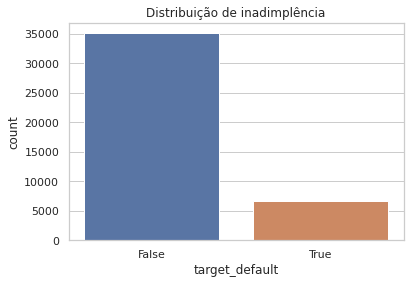

In [47]:
# Balanceamento do dataset
print(df.target_default.value_counts())
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title('Distribuição de inadimplência')
plt.plot()

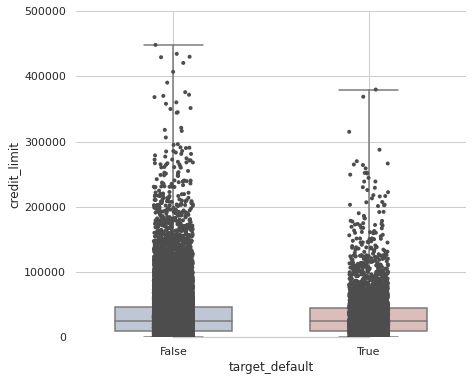

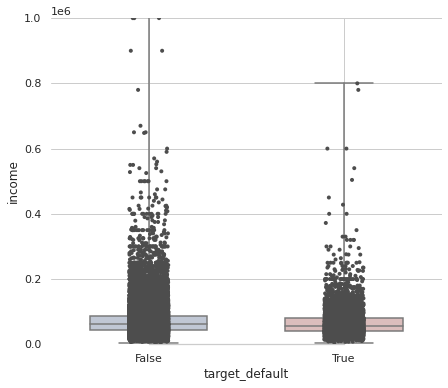

In [48]:
# Plotar bloxplot para análise de outliers
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="target_default", y="credit_limit", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-20, 500000))
sns.stripplot(x="target_default", y="credit_limit", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="credit_limit")
sns.despine(trim=True, left=True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="target_default", y="income", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-20, 1000000))
sns.stripplot(x="target_default", y="income", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="income")
sns.despine(trim=True, left=True)

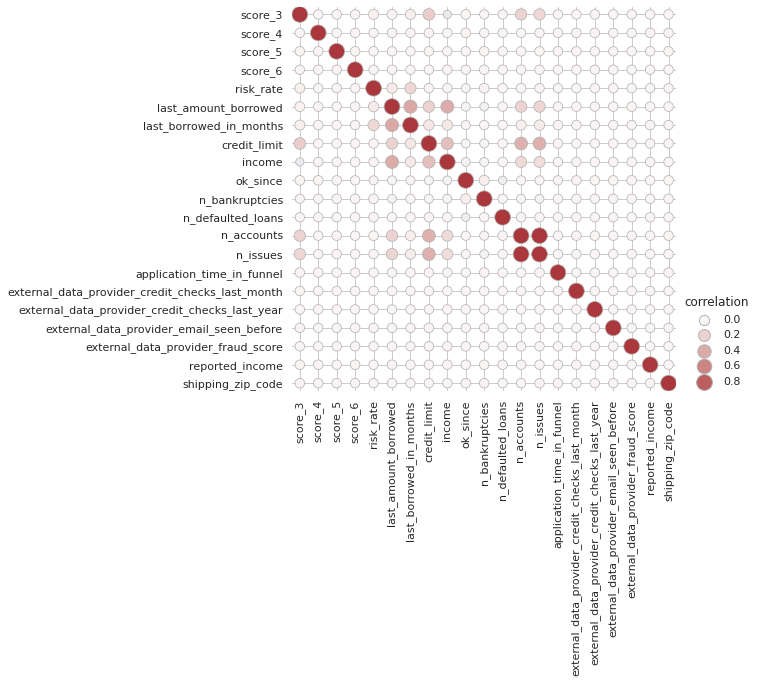

In [49]:
# Estudar a correlação entre as variáveis
sns.set_theme(style="whitegrid")
used_columns = (df.columns)
df = df.loc[:, used_columns]
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Ao passar por toda essa análise exploratória, conseguimos perceber que:

* O dataset possui, 43 colunas (variáveis) e 45000 linhas (entradas);
* Temos variáveis do tipo 'object' , 'int' e 'float';
* O dataset apresenta muitos valores ausentes em algumas colunas. Será necessário um tratamento para as mesmas;
* Há algumas colunas com entradas codificadas, sem valor para nossa análise, estas irão ser excluídas;
* A variável alvo é 'target_default', percebemos que o dataset está desbalanceado;
* Algumas variáveis, devem ser transformadas para numéricas;
* Há possíveis outliers nas variáveis 'credit_limit' e 'income';

**Neste resumo acima, conseguimos extrair informações extremamente relevantes do dataset em questão. Vamos dar sequência no trabalho fazendo uma preparação e limpeza do nosso dataset, pois, descobrimos diversos pontos que precisam ser tratados no mesmo para, assim, conseguirmos montar um modelo de machine learning.**

## Preparação dos Dados

Nesta etapa vamos focar em fazer os seguintes comandos:

* Criar uma cópia do dataset original;
* Eliminar colunas que não contém informações úteis;
* Tratar os valores ausentes;
* Transformar coluna 'lat_lon' em númerica;
* Alterar as variáveis categóricas para numéricas;
* Balancear o conjunto de dados;
* Dividir o conjunto de dados entre treino e teste;
* Fazer nova matriz de correlação.

In [50]:
# Criar uma cópia do dataset
df_clean = df.copy()

# Eliminar colunas que não contém informações úteis para o modelo
df_clean = df_clean.drop(["ids" , "score_1" , "score_2" , "reason" , "state" , "zip" , "channel" , "job_name" , "real_state" , "application_time_applied" ,
                          "external_data_provider_first_name" , "profile_phone_number" , "profile_tags" , "user_agent" , "target_fraud" , 
                          "shipping_state" , "marketing_channel" , "external_data_provider_credit_checks_last_2_year"], axis=1)

#  substituir -999 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# substituir inf por nan em reported_income 
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)
# Verificar dataset modificado
df_clean.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,reported_income,shipping_zip_code
0,False,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,NaN,0.0,0.0,18.0,18.0,444,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",57849.0,17528
1,False,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,False,50.0,0.0,0.0,14.0,14.0,346,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",4902.0,40933
2,True,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,NaN,NaN,0.0,0.0,10.0,NaN,6,gmail.com,2,NaN,9.0,65,"(-28.748023890412284, -51.867279334353995)",163679.0,50985
3,False,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,False,NaN,1.0,0.0,19.0,19.0,406,spgov.com,3,NaN,38.0,815,"(-17.520650158450454, -39.75801139933186)",1086.0,37825
4,False,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,True,NaN,0.0,0.0,11.0,NaN,240,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",198618.0,52827


In [51]:
# Substituir valores ausentes
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

In [52]:
# Verificar os valores ausentes
df_clean.isnull().sum() / df_clean.shape[0]

target_default                                     0.0
score_3                                            0.0
score_4                                            0.0
score_5                                            0.0
score_6                                            0.0
risk_rate                                          0.0
last_amount_borrowed                               0.0
last_borrowed_in_months                            0.0
credit_limit                                       0.0
income                                             0.0
facebook_profile                                   0.0
ok_since                                           0.0
n_bankruptcies                                     0.0
n_defaulted_loans                                  0.0
n_accounts                                         0.0
n_issues                                           0.0
application_time_in_funnel                         0.0
email                                              0.0
external_d

In [53]:
# Separar a coluna 'lat_lon'
divisao = df_clean['lat_lon'].str.split(',')
divisao.head()
lat = divisao.str.get(0)
lon = divisao.str.get(1)
df_clean["lat"] = lat
df_clean["lon"] = lon
df_clean = df_clean.drop(['lat_lon'] , axis=1)
df_clean.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,lat,lon
0,False,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,32.0,0.0,0.0,18.0,18.0,444.0,outlook.com,2.0,0.0,51.0,645.0,57849.0,17528.0,(-29.151545708122246,-51.1386461804385)
1,False,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,False,50.0,0.0,0.0,14.0,14.0,346.0,gmail.com,1.0,0.0,17.0,243.0,4902.0,40933.0,(-19.687710705798963,-47.94151536525154)
2,True,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25647.0,65023.65,False,32.0,0.0,0.0,10.0,0.0,6.0,gmail.com,2.0,1.0,9.0,65.0,163679.0,50985.0,(-28.748023890412284,-51.867279334353995)
3,False,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,False,32.0,1.0,0.0,19.0,19.0,406.0,spgov.com,3.0,1.0,38.0,815.0,1086.0,37825.0,(-17.520650158450454,-39.75801139933186)
4,False,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25647.0,60011.29,True,32.0,0.0,0.0,11.0,0.0,240.0,gmail.com,2.0,1.0,46.0,320.0,198618.0,52827.0,(-16.574259446978008,-39.90990074785962)


In [54]:
# Eliminar caracteres indesejados na coluna 'lat'
def corrigir_nomes(nome):
    nome = nome.replace('(', '')
    return nome
df_clean['lat'] = df_clean['lat'].apply(corrigir_nomes).astype(float)

In [55]:
# Eliminar caracteres indesejados na coluna 'lon'
def corrigir_nomes_2(nome_2):
    nome_2 = nome_2.replace(')', '')
    return nome_2
df_clean['lon'] = df_clean['lon'].apply(corrigir_nomes_2).astype(float)

In [56]:
# Alterar as variáveis categóricas para numéricas
# Colunas a serem transformadas em binárias
object_cols_bin = ['target_default' , 'facebook_profile']

# Criar uma cópia do dataframe
df_mod = df_clean.copy()

# 1. Transformar as variáveis binárias
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols_bin:
  df_mod[col] = label_encoder.fit_transform(df_mod[col])

# 2. Transformar as variáveis não binárias
object_cols_nbin = ['email']
df_mod_2 = df_mod[object_cols_nbin]
df_mod_2 = pd.get_dummies(df_mod)

# 3. Excluir as colunas não binárias do df_mod
df_mod = df_mod.drop(columns=['email'])

#4. Unir os dois dataframes formados
df_final = pd.merge(df_mod , df_mod_2)
df_final.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,lat,lon,email_gmail.com,email_gmaill.com,email_hotmail.com,email_hotmaill.com,email_outlook.com,email_spgov.com
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,1,32.0,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,17528.0,-29.151546,-51.138646,0,0,0,0,1,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,0,50.0,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,40933.0,-19.687711,-47.941515,1,0,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25647.0,65023.65,0,32.0,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0,50985.0,-28.748024,-51.867279,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,0,32.0,1.0,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0,37825.0,-17.520650,-39.758011,0,0,0,0,0,1
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25647.0,60011.29,1,32.0,0.0,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0,52827.0,-16.574259,-39.909901,1,0,0,0,0,0


In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   45000 non-null  int64  
 1   score_3                                          45000 non-null  float64
 2   score_4                                          45000 non-null  float64
 3   score_5                                          45000 non-null  float64
 4   score_6                                          45000 non-null  float64
 5   risk_rate                                        45000 non-null  float64
 6   last_amount_borrowed                             45000 non-null  float64
 7   last_borrowed_in_months                          45000 non-null  float64
 8   credit_limit                                     45000 non-null  float64
 9   income                      

In [58]:
# Dividir o conjunto de dados entre treino e teste
from sklearn.model_selection import train_test_split
X = df_final.drop("target_default" , axis=1)
y = df_final["target_default"]
X_train , X_test , y_train , y_test = train_test_split(X , y)

1    4983
0    4983
dtype: int64


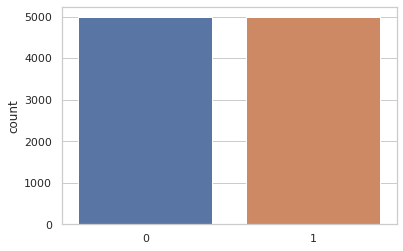

In [59]:
# Balancear o conjunto de dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

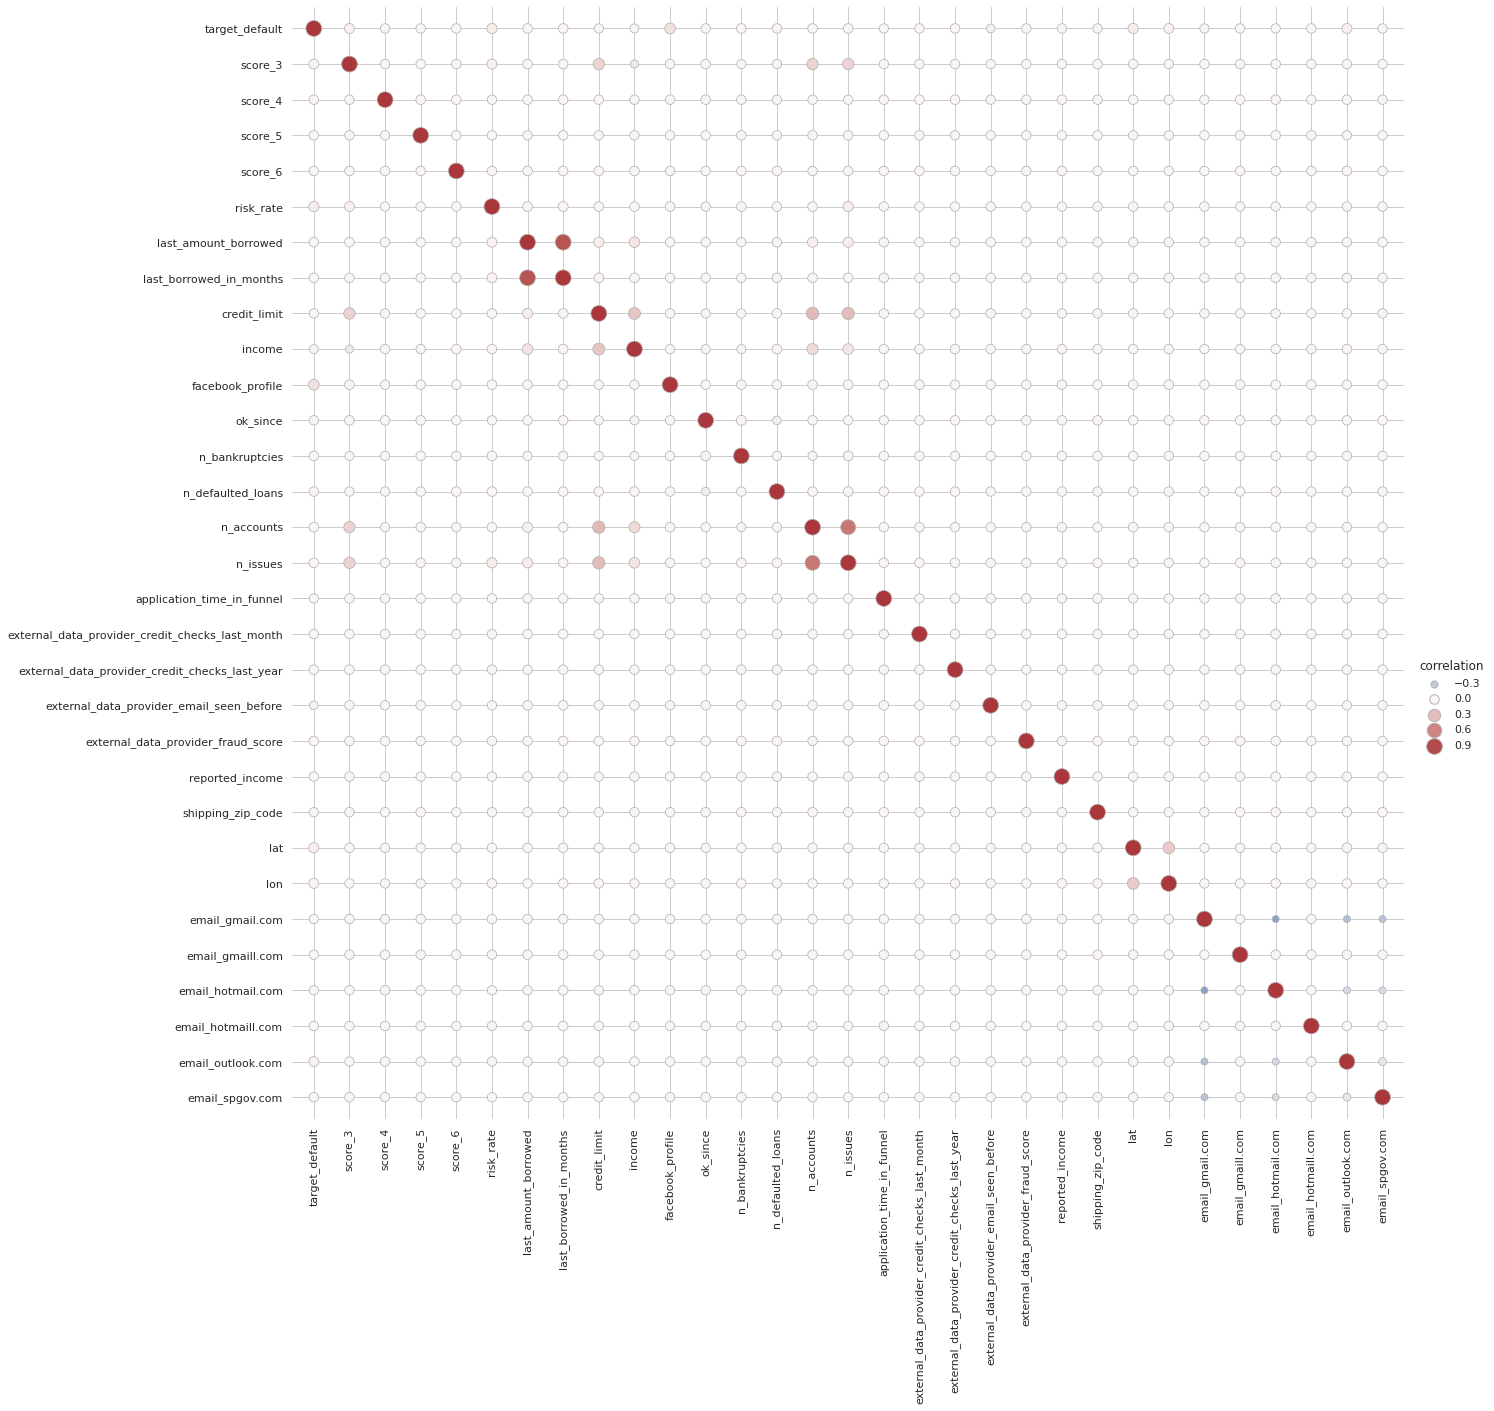

In [60]:
# Plotar nova matriz de correlação
sns.set_theme(style="whitegrid")
used_columns = (df_final.columns)
df_final = df_final.loc[:, used_columns]
corr_mat = df_final.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=20, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

**Nesta etapa de preparação dos dados conseguimos deixar o nosso dataframe pronto e organizado para a próxima etapa, que é executar um modelo de machine learning.**

Gostaria de ressaltar o quanto foi importante as duas etapas feitas acima que foram a análise exploratória e a preparação dos dados. A preparação dos dados só foi possível graças as conclusões que chegamos na análise exploratória e o modelo de machine learning só será possível por causa da etapa de preparação dos dados, sem ela nosso modelo não teria a eficácia que agora ele tem condições de ter.

## Modelo de Machine Learning

Chegamos finalmente na etapa da criação do modelo de machine learning. Nessa etapa a intenção é criar alguns modelos de classificação e compara-los, assim teremos condições de adotar o que tenha uma melhor eficácia.

Vamos adotar os seguintes modelos:

* Random forest;
* Decision tree;
* Stochastic Gradient Descent;
* SVC;
* Regressão Logística;
* XGB
* LightGBM.

Para avaliar os desempenhos do modelo, neste trabalho iremos aplicar a validação cruzada.

In [61]:
# Construindo função de avaliação dos modelos
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def val_model(X , y , clf , quite=False):
    X = np.array(X)
    y = np.array(y)
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')
    if quite == False:
        print("Acurácia: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    return scores.mean()

In [62]:
# Avaliação dos modelos
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Instanciar os modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
model = []
acc = []

# 2. Padronizar os dados de treino
scaler = preprocessing.StandardScaler().fit(X_rus)
X_train_transformed = scaler.transform(X_rus)

# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_train_transformed, y_rus, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])

,acc
RandomForestClassifier,0.632449
DecisionTreeClassifier,0.569135
SGDClassifier,0.587297
SVC,0.609371
LogisticRegression,0.614287
XGBClassifier,0.648404
LGBMClassifier,0.640176


Acima, vimos a acurácia de todos os modelos adotados para classificação. Podemos ver que os que alcançaram maior eficácia foram os modelos de LGBMClassifier e XGB. O modelo de XGB ficou na frente por pouco e por isso vamos adota-lo.

## Otimização do modelo adotado - XGBoost

Antes de executar o modelo preditivo com o XGBoost, vamos tentar otimizar alguns parâmetros. Nesse caso, por ser um modelo de classificação, vamos otimizar alguns parâmetros para o tree booster.


In [63]:
# 1. Avaliação e otimização dos parâmetros (Deixando todos os parâmetros como default e estudando apenas o parâmetro 'n_estimators')
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
param_grid = {'n_estimators':[100, 500, 1000]}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6493080647565186 para {'n_estimators': 100}


In [64]:
# 2. Otimizar o parâmetro max_depth, ele representa a profundidade de cada árvore, que é o número máximo de recursos diferentes usados em cada árvore
xgb = XGBClassifier(n_estimators=100)
param_grid = {'max_depth':range(10)}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6517159913475365 para {'max_depth': 2}


In [65]:
# 3. Otimizar o parâmetro learning_rate(normalmente entre 0,1 e 0,01)
xgb = XGBClassifier(n_estimators=100 , max_depth=2)
param_grid = {'learning_rate':[0.001 , 0.01 , 0.05 , 0.1 , 0.3]}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6492075624463752 para {'learning_rate': 0.1}


In [66]:
# 4. Otimizar o parâmetro subsample(normalmente entre 0,8 a 1)
xgb = XGBClassifier(n_estimators=100 , max_depth=2 , learning_rate=0.1)
param_grid = {'subsample':[0.8 , 0.9 , 1]}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6500068478527954 para {'subsample': 0.9}


In [67]:
# 5. Otimizar o parâmetro colsample_bytree(normalmente entre 0,3 a 0,8)
xgb = XGBClassifier(n_estimators=100 , max_depth=2 , learning_rate=0.1 , subsample=0.9)
param_grid = {'colsample_bytree':[0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8]}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6489055519973574 para {'colsample_bytree': 0.5}


In [68]:
# 6. Otimizar o parâmetro gamma(normalmente 0,1 ou 5)
xgb = XGBClassifier(n_estimators=100 , max_depth=2 , learning_rate=0.1 , subsample=0.9 , colsample_bytree=0.5)
param_grid = {'gamma':[0 , 0.1 , 5]}
kfold = StratifiedKFold(n_splits=10 , shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_transformed , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6487089783406443 para {'gamma': 0}


              precision    recall  f1-score   support

           0       0.91      0.69      0.78      9572
           1       0.25      0.60      0.35      1678

    accuracy                           0.67     11250
   macro avg       0.58      0.64      0.57     11250
weighted avg       0.81      0.67      0.72     11250



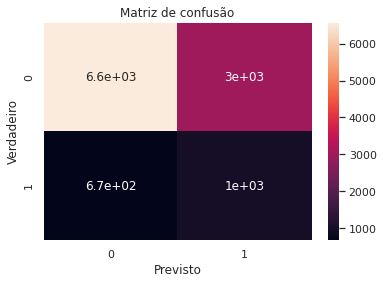

In [69]:
# Modelo final
xgb = XGBClassifier(n_estimators=100 , max_depth=2 , learning_rate=0.1 , subsample=0.9 , colsample_bytree=0.5 , gamma=0)
xgb.fit(X_train_transformed , y_rus)

# Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Imprimir relatório de classificação
print(classification_report(y_test , y_pred))

# Plotar matriz de confusão
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()

## Conclusão

Conseguimos uma acurácia de 0.67 para o modelo de XGBoost, ficando até um pouco melhor quando medimos a acurácia apenas com os dados de treino. Foi estudado alguns parâmetros que achei mais pertinentes ao modelo, porém é possível testar mais parâmetros para tentar melhorar ainda mais esse modelo.